# Q-dependence

In [156]:
import sys,os
import numpy as np
import pandas as pd
import pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib.font_manager import FontProperties
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import minimize, curve_fit

In [157]:
font0=FontProperties()
font0.set_family('sans-serif')
font0.set_style('italic')
font0.set_variant('normal')

## Fixed qT

In [158]:
clist=['black', 'blue', 'red', 'forestgreen', 'magenta', 'turquoise', 'orange']

In [159]:
def thy(Q, a0, a1):
    return np.exp(a0 + a1 * Q)

### E288-200

In [160]:
Data=np.loadtxt('path/DY/DY.E288_200.list', skiprows=15)
data={}

In [161]:
qt=np.unique(Data[:,1])
unit = 1e36
for i in qt:
    data[i]=Data[(Data[:,1] == i) * (Data[:,0] != 9.5) * (Data[:,0] != 10.5)]
    data[i][:,2] = data[i][:,2] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit
    data[i][:,3] = data[i][:,3] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit

In [162]:
cqt = {}
for i in qt:
    if len(data[i]) > 3:
        res, cov = curve_fit(thy, xdata=data[i][:,0], ydata=data[i][:,2], sigma=data[i][:,3])
        cqt[i] = res

[ 0.1  0.7  1.3  1.9  2.5  3.1] [ 0.3  0.9  1.5  2.1  2.7  3.3] [ 0.5  1.1  1.7  2.3  2.9]


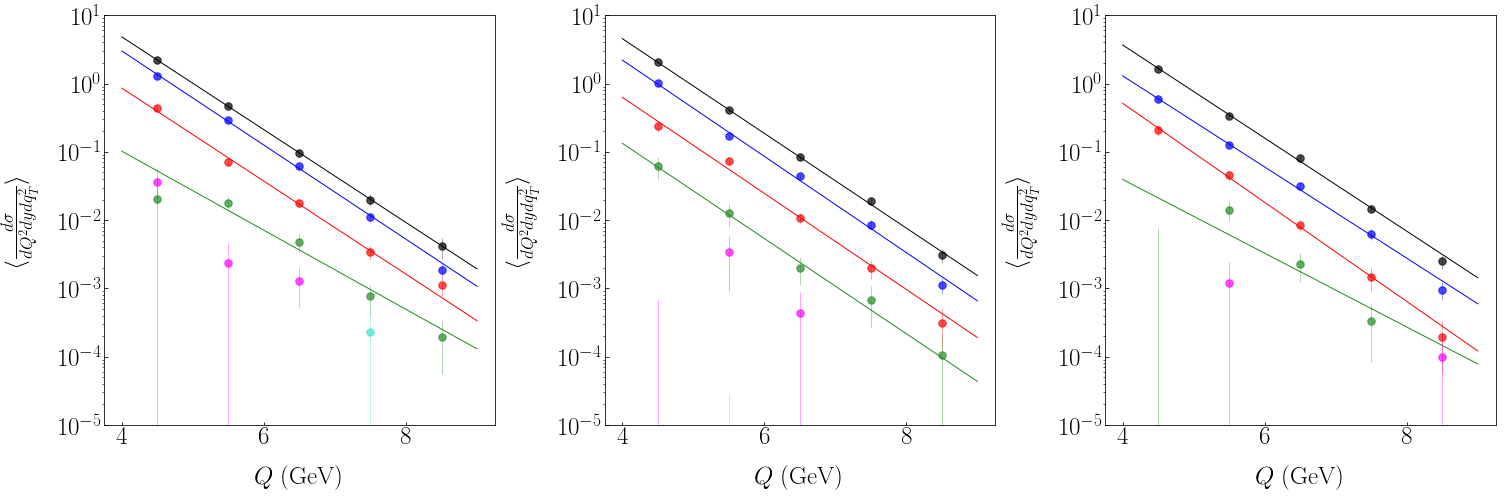

In [163]:
print qt[0::3], qt[1::3], qt[2::3]

X = np.linspace(4.0, 9.0, 20)

nrows,ncols=1,3
fig=py.figure(figsize=(ncols*7,nrows*7))

ax=fig.add_subplot(nrows,ncols,1)
for i in range(len(qt)):
    if i%3 == 0:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,2)
for i in range(len(qt)):
    if i%3 == 1:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,3)
for i in range(len(qt)):
    if i%3 == 2:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)


fig.tight_layout()
#fig.savefig("tmp.png")

### E288-300

In [164]:
Data=np.loadtxt('path/DY/DY.E288_300.list', skiprows=15)
data={}

In [165]:
qt=np.unique(Data[:,1])
unit = 1e36
for i in qt:
    data[i]=Data[(Data[:,1] == i) * (Data[:,0] != 9.5) * (Data[:,0] != 10.5)]
    data[i][:,2] = data[i][:,2] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit
    data[i][:,3] = data[i][:,3] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit

In [166]:
cqt = {}
for i in qt:
    if len(data[i]) > 3:
        res, cov = curve_fit(thy, xdata=data[i][:,0], ydata=data[i][:,2], sigma=data[i][:,3])
        cqt[i] = res

[ 0.1  0.7  1.3  1.9  2.5  3.1  3.9] [ 0.3  0.9  1.5  2.1  2.7  3.3  4.1] [ 0.5  1.1  1.7  2.3  2.9  3.7  4.5]


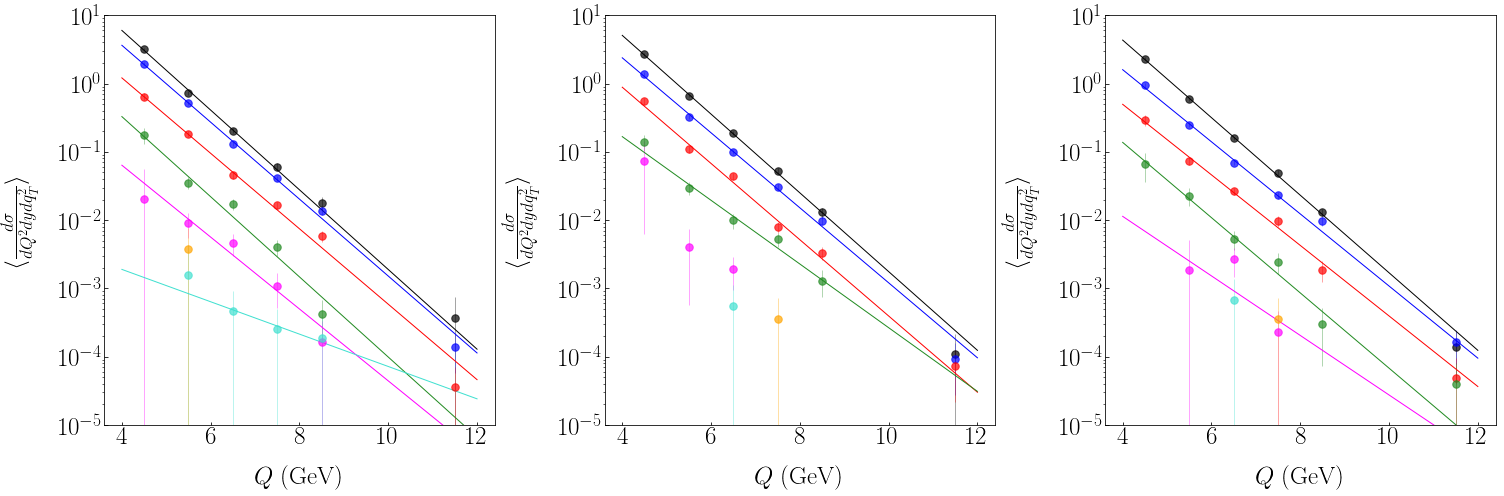

In [167]:
print qt[0::3], qt[1::3], qt[2::3]

X = np.linspace(4.0, 12.0, 20)

nrows,ncols=1,3
fig=py.figure(figsize=(ncols*7,nrows*7))

ax=fig.add_subplot(nrows,ncols,1)
for i in range(len(qt)):
    if i%3 == 0:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,2)
for i in range(len(qt)):
    if i%3 == 1:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,3)
for i in range(len(qt)):
    if i%3 == 2:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)


fig.tight_layout()
#fig.savefig("tmp.png")

### E288-400

In [168]:
Data=np.loadtxt('path/DY/DY.E288_400.list', skiprows=15)
data={}

In [169]:
qt=np.unique(Data[:,1])
unit = 1e36
for i in qt:
    data[i]=Data[(Data[:,1] == i) * (Data[:,0] != 9.5) * (Data[:,0] != 10.5)]
    data[i][:,2] = data[i][:,2] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit
    data[i][:,3] = data[i][:,3] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit

In [170]:
cqt = {}
for i in qt:
    if len(data[i]) > 3:
        res, cov = curve_fit(thy, xdata=data[i][:,0], ydata=data[i][:,2], sigma=data[i][:,3])
        cqt[i] = res

[ 0.1  0.7  1.3  1.9  2.5  3.1  3.7  4.3  4.9] [ 0.3  0.9  1.5  2.1  2.7  3.3  3.9  4.5] [ 0.5  1.1  1.7  2.3  2.9  3.5  4.1  4.7]


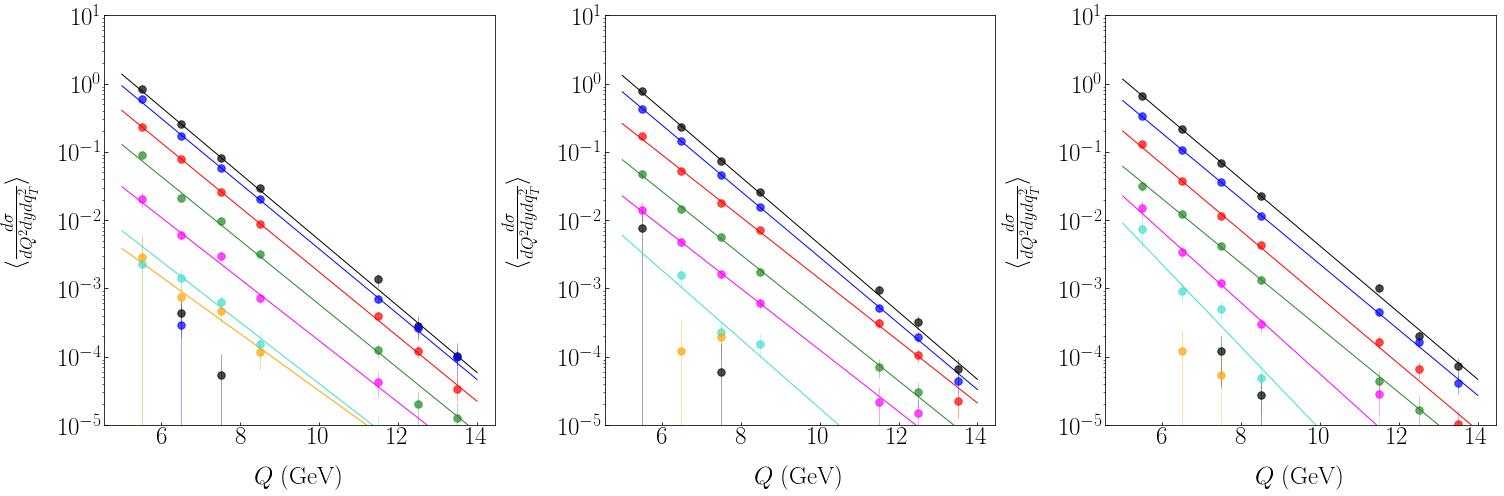

In [171]:
print qt[0::3], qt[1::3], qt[2::3]

X = np.linspace(5.0, 14.0, 20)

nrows,ncols=1,3
fig=py.figure(figsize=(ncols*7,nrows*7))

ax=fig.add_subplot(nrows,ncols,1)
for i in range(len(qt)):
    if i%3 == 0:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,2)
for i in range(len(qt)):
    if i%3 == 1:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,3)
for i in range(len(qt)):
    if i%3 == 2:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)


fig.tight_layout()
#fig.savefig("tmp.png")

### E605

In [172]:
Data=np.loadtxt('path/DY/DY.E605.list', skiprows=15)
data={}

In [173]:
qt=np.unique(Data[:,1])
unit = 1e36
for i in qt:
    data[i]=Data[(Data[:,1] == i) * (Data[:,0] != 9.5) * (Data[:,0] != 10.5)]
    for j in range(len(data[i])):
        if data[i][j,0] < 11.5:
            data[i][j,2] = data[i][j,2] / ((data[i][j,0]+0.5)**2 - (data[i][j,0]-0.5)**2) * np.pi * unit
            data[i][j,3] = data[i][j,3] / ((data[i][j,0]+0.5)**2 - (data[i][j,0]-0.5)**2) * np.pi * unit
        elif data[i][j,0] < 13.5:
            data[i][j,2] = data[i][j,2] / ((data[i][j,0]+1.0)**2 - (data[i][j,0]-1.0)**2) * np.pi * unit
            data[i][j,3] = data[i][j,3] / ((data[i][j,0]+1.0)**2 - (data[i][j,0]-1.0)**2) * np.pi * unit
        else:
            data[i][j,2] = data[i][j,2] / ((data[i][j,0]+2.25)**2 - (data[i][j,0]-2.25)**2) * np.pi * unit
            data[i][j,3] = data[i][j,3] / ((data[i][j,0]+2.25)**2 - (data[i][j,0]-2.25)**2) * np.pi * unit

In [174]:
cqt = {}
for i in qt:
    if len(data[i]) > 3:
        res, cov = curve_fit(thy, xdata=data[i][:,0], ydata=data[i][:,2], sigma=data[i][:,3])
        cqt[i] = res

[ 0.1  0.7  1.3  1.9  2.5  3.1] [ 0.3  0.9  1.5  2.1  2.7  3.3] [ 0.5  1.1  1.7  2.3  2.9  3.5]


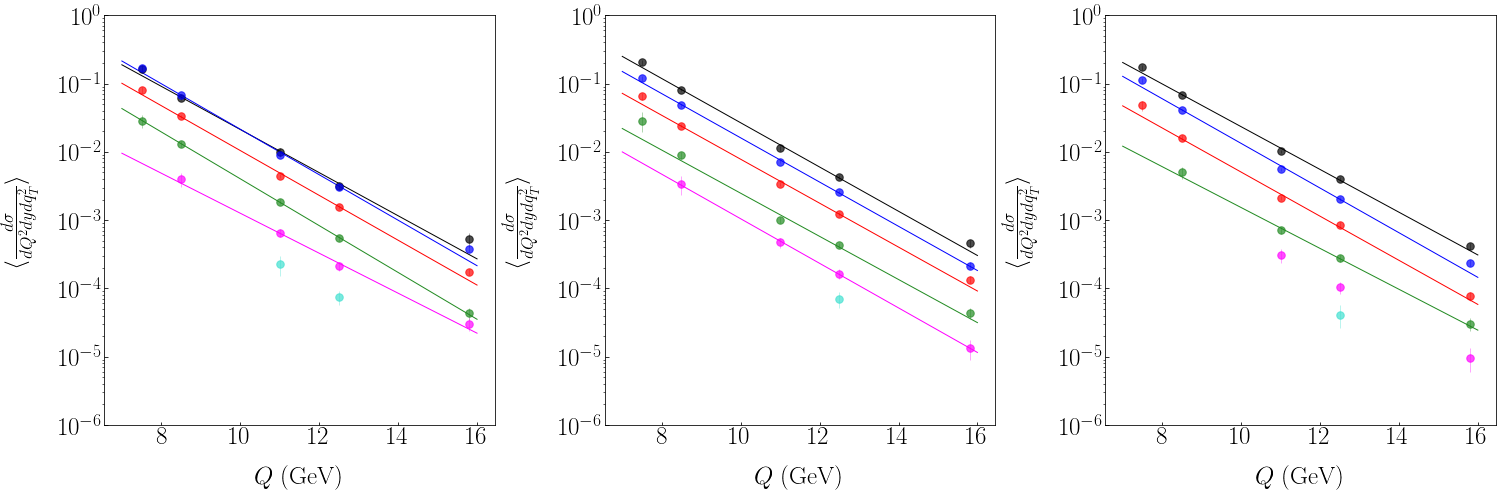

In [175]:
print qt[0::3], qt[1::3], qt[2::3]

X = np.linspace(7.0, 16.0, 20)

nrows,ncols=1,3
fig=py.figure(figsize=(ncols*7,nrows*7))

ax=fig.add_subplot(nrows,ncols,1)
for i in range(len(qt)):
    if i%3 == 0:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-6,1e0)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,2)
for i in range(len(qt)):
    if i%3 == 1:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-6,1e0)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,3)
for i in range(len(qt)):
    if i%3 == 2:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-6,1e0)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)


fig.tight_layout()
#fig.savefig("tmp.png")

### E772

In [176]:
Data=np.loadtxt('path/DY/DY.E772.list', skiprows=15)
data={}

In [177]:
qt=np.unique(Data[:,1])
unit = 1e0
for i in qt:
    data[i]=Data[(Data[:,1] == i) * (Data[:,0] != 9.5) * (Data[:,0] != 10.5)]
    data[i][:,2] = data[i][:,2] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit
    data[i][:,3] = data[i][:,3] / ((data[i][:,0]+0.5)**2 - (data[i][:,0]-0.5)**2) * np.pi * unit

In [178]:
cqt = {}
for i in qt:
    if len(data[i]) > 3:
        res, cov = curve_fit(thy, xdata=data[i][:,0], ydata=data[i][:,2], sigma=data[i][:,3])
        cqt[i] = res

[ 0.125  0.875  1.625  2.375  3.125  3.875] [ 0.375  1.125  1.875  2.625  3.375] [ 0.625  1.375  2.125  2.875  3.625]


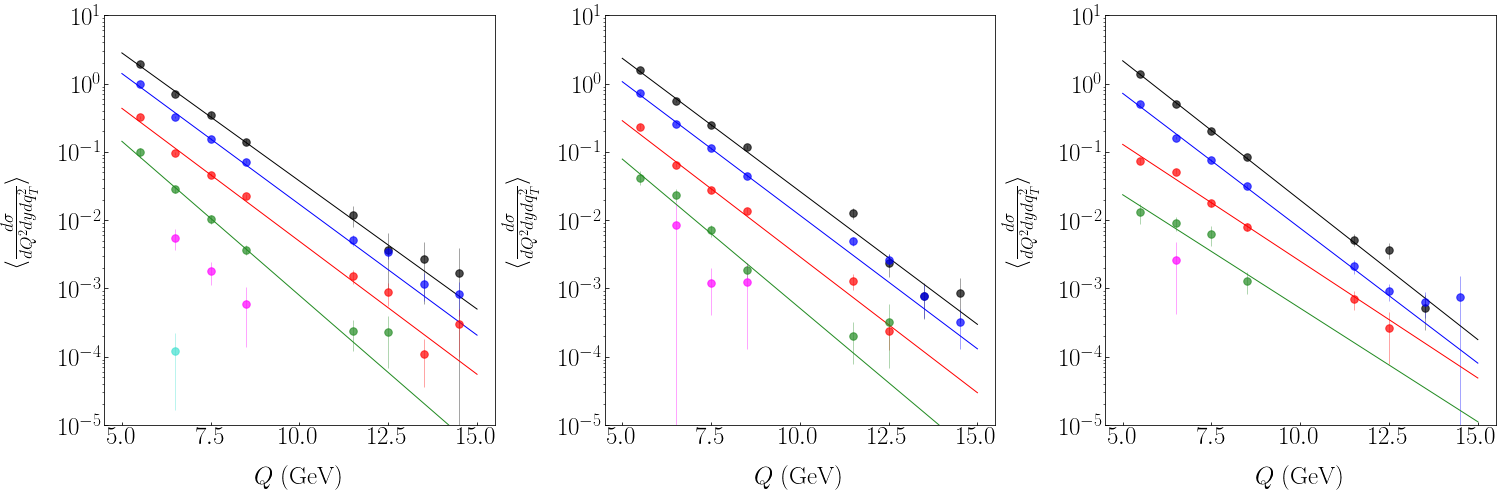

In [179]:
print qt[0::3], qt[1::3], qt[2::3]

X = np.linspace(5.0, 15.0, 20)

nrows,ncols=1,3
fig=py.figure(figsize=(ncols*7,nrows*7))

ax=fig.add_subplot(nrows,ncols,1)
for i in range(len(qt)):
    if i%3 == 0:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,2)
for i in range(len(qt)):
    if i%3 == 1:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)

ax=fig.add_subplot(nrows,ncols,3)
for i in range(len(qt)):
    if i%3 == 2:
        ax.errorbar(data[qt[i]][:,0], data[qt[i]][:,2], yerr=data[qt[i]][:,3], color=clist[(i//3)%7], alpha=0.7, marker='.', linestyle='none', markersize=15, linewidth=0.5)
        if qt[i] in cqt:
            ax.plot(X, thy(X, cqt[qt[i]][0], cqt[qt[i]][1]), linewidth=1, color=clist[(i//3)%7])
#setting
ax.tick_params(axis='both', which='major', direction='in', labelsize=25, pad=1)
ax.set_xlabel(r'$Q~\rm(GeV)$', fontsize=25, labelpad=15)
ax.set_ylabel(r'$\langle \frac{d\sigma}{dQ^2dydq_T^2}\rangle$', fontsize=25, labelpad=15)
ax.set_ylim(1e-5,1e1)
ax.set_yscale('log')
#ax.text(0.1,0.9,r'$x=0.1$',horizontalalignment='left',transform=ax.transAxes,size=20)


fig.tight_layout()
#fig.savefig("tmp.png")

### D0 Run I

### D0 Run II

### CDF Run I

### CDF Run II